<a href="https://colab.research.google.com/github/musicjae/GNN/blob/main/Deep_Learning_on_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference  
[1] https://www.researchgate.net/publication/343948931_Deep_Learning_on_Graphs_a_Tutorial  
[2] 그래프 용어 정리 https://gmlwjd9405.github.io/2018/08/13/data-structure-graph.html

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!pip install networkx # https://networkx.org/

In [6]:
import networkx as nx

- Edge List  
  
0 1  

0 2  

1 2  

1 3  

1 4  

2 4  

2 0  

2 1  

3 4  

3 1  

4 3  

4 0 

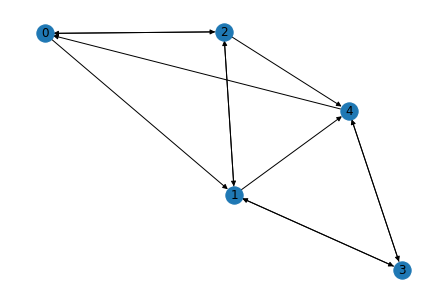

In [13]:
graphex = nx.read_edgelist('/content/drive/MyDrive/dataset/gnn/edge_list.txt',nodetype=int,create_using=nx.DiGraph()) # create_using=nx.DiGraph() 유향 그래프 사용 여부
labels = {0:'0',1:'1',2:'2',3:'3',4:'4'}
nx.draw(graphex,labels = labels)

이 그래프에서 노드 0에서 노드 3으로 가는 최단 거리의 길이는 무엇인가?

In [14]:
nx.shortest_path_length(graphex,source=0,target=3)

2

노드 3에서 노드 2로 가는 최단 거리는 무엇인가?

In [16]:
nx.shortest_path(graphex,3,2)

[3, 1, 2]

shortest path computation and graph 
cycle detection.

In [17]:
for cycle in nx.simple_cycles(graphex):
    print(cycle)

[0, 2, 1, 4]
[0, 2, 1, 3, 4]
[0, 2]
[0, 2, 4]
[0, 1, 4]
[0, 1, 3, 4]
[0, 1, 2]
[0, 1, 2, 4]
[1, 4, 3]
[1, 3]
[1, 2]
[1, 2, 4, 3]
[3, 4]


엣지 구하기

In [18]:
graphex.edges()

OutEdgeView([(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (2, 0), (2, 1), (3, 4), (3, 1), (4, 3), (4, 0)])

차수 구하기

In [22]:
graphex.in_degree()

InDegreeView({0: 2, 1: 3, 2: 2, 3: 2, 4: 3})

In [24]:
graphex.size()

12

- 엣지 속성: weight  
- 노드 속성: value

엣지 속성 더하기

In [66]:
c = 0
for edge in graphex.edges():
    graphex[edge[0]][edge[1]]['weight'] = c
    c = c+1
    print(c)


1
2
3
4
5
6
7
8
9
10
11
12


In [67]:
for i in range(5):
    graphex.nodes[i]['value'] = 3.14+i
print(graphex.nodes[3])

{'value': 6.140000000000001}


In [69]:
graphex.nodes[0]['value']

3.14

## DGL graphs

Deep Graph Library (DGL) # https://docs.dgl.ai/

In [34]:
!pip install dgl

     |████████████████████████████████| 3.6MB 5.5MB/s 


In [80]:
import dgl
import torch

In [79]:

dG = dgl.from_networkx(graphex)
print(type(dG))

<class 'dgl.heterograph.DGLHeteroGraph'>


In [62]:
dG.in_degrees()

tensor([2, 3, 2, 2, 3])

In [82]:
dG.ndata['one'] = torch.ones(5)
dG.ndata['deg'] = dG.in_degrees().float()

In [83]:
dG.ndata['deg']

tensor([2., 3., 2., 2., 3.])

In [85]:
dG.ndata

{'one': tensor([1., 1., 1., 1., 1.]), 'deg': tensor([2., 3., 2., 2., 3.])}

In [87]:
dG.has_node

<bound method DGLHeteroGraph.has_node of Graph(num_nodes=5, num_edges=12,
      ndata_schemes={'one': Scheme(shape=(), dtype=torch.float32), 'deg': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={})>

 ## DGL Message Passing

- DGL의 가장 중요한 저차원 특징 중 하나는 메시지가 한 노드에서 다르나 노드로 전달되는 과정이다. 이것은 어떻게 그래프에서 컨볼루션, 트랜스포머 같은 연산이 이용되는가이다.